# 作業

> 使用 application_train.csv 的資料

> 1. 列出 AMT_ANNUITY 的 q0 - q100

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# app_train['AMT_ANNUITY'].value_counts()
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [3]:
for num in range(0, 101):
    per = num / 100
    print('q%d: %.2f' % (num, app_train['AMT_ANNUITY'].quantile(per)))

q0: 1615.50
q1: 6182.91
q2: 6750.00
q3: 7875.00
q4: 8703.00
q5: 9000.00
q6: 9000.00
q7: 9553.50
q8: 10125.00
q9: 10503.00
q10: 11074.50
q11: 11430.00
q12: 11970.00
q13: 12375.00
q14: 12838.50
q15: 13302.00
q16: 13500.00
q17: 13500.00
q18: 13896.00
q19: 14350.50
q20: 14701.50
q21: 15124.50
q22: 15583.50
q23: 15970.50
q24: 16209.00
q25: 16524.00
q26: 16852.50
q27: 17109.00
q28: 17487.00
q29: 17806.50
q30: 18189.00
q31: 18643.50
q32: 19102.50
q33: 19417.50
q34: 19836.00
q35: 20151.00
q36: 20421.00
q37: 20853.00
q38: 21186.00
q39: 21609.00
q40: 21865.50
q41: 22018.50
q42: 22342.50
q43: 22527.00
q44: 22972.50
q45: 23346.00
q46: 23719.50
q47: 23931.00
q48: 24259.50
q49: 24583.59
q50: 24903.00
q51: 25240.50
q52: 25537.50
q53: 25960.50
q54: 26217.00
q55: 26316.00
q56: 26640.00
q57: 26860.50
q58: 27189.00
q59: 27558.00
q60: 28062.00
q61: 28480.50
q62: 28917.00
q63: 29340.00
q64: 29830.50
q65: 30078.00
q66: 30483.00
q67: 30897.00
q68: 31275.00
q69: 31630.50
q70: 32004.00
q71: 32458.50
q72: 32895

> 2-1. 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補

In [4]:
print("Count of Nan in AMT_ANNUITY is %d" % (app_train['AMT_ANNUITY'].isna().sum()))
app_train.loc[app_train['AMT_ANNUITY'].isna(), 'AMT_ANNUITY'].head()

Count of Nan in AMT_ANNUITY is 12


47531   NaN
50035   NaN
51594   NaN
55025   NaN
59934   NaN
Name: AMT_ANNUITY, dtype: float64

In [5]:
annuity_median = app_train['AMT_ANNUITY'].median()
print("The Median value is %d" % (annuity_median))

app_train.loc[app_train['AMT_ANNUITY'].isna(), ['AMT_ANNUITY']] = annuity_median
print('Count of Nan field after replacement: %d' % (app_train['AMT_ANNUITY'].isna().sum()))

The Median value is 24903
Count of Nan field after replacement: 0


> 2-2. 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間

{'whiskers': [<matplotlib.lines.Line2D at 0x101ec3d30>,
 'caps': [<matplotlib.lines.Line2D at 0x101ed19e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x101ec3c18>],
 'medians': [<matplotlib.lines.Line2D at 0x101ed1ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x101edf6a0>],
 'means': []}

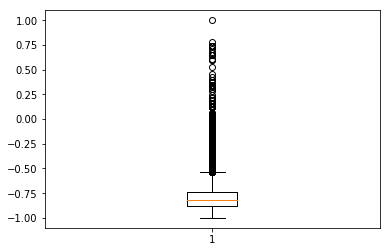

In [6]:
normal_annuity = (app_train['AMT_ANNUITY'] - app_train['AMT_ANNUITY'].min()) / (app_train['AMT_ANNUITY'].max()-app_train['AMT_ANNUITY'].min()) * 2 - 1
plt.boxplot(normal_annuity)

> 2-3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

坑人啊，這欄位是 AMT_GOODS_PRICE，少個 S

In [7]:
print("Count of Nan in AMT_GOODS_PRICE is %d" % (app_train['AMT_GOODS_PRICE'].isna().sum()))
app_train.loc[app_train['AMT_GOODS_PRICE'].isna(), ['AMT_GOODS_PRICE']].head()

Count of Nan in AMT_GOODS_PRICE is 278


,AMT_GOODS_PRICE
724,NaN
5937,NaN
6425,NaN
6703,NaN
7647,NaN


In [8]:
goods_price_mode = app_train['AMT_GOODS_PRICE'].mode().item()
print("The Mode value is %d" % (goods_price_mode))

app_train.loc[app_train['AMT_GOODS_PRICE'].isna(), ['AMT_GOODS_PRICE']] = goods_price_mode
print('Count of Nan field after replacement: %d' % (app_train['AMT_GOODS_PRICE'].isna().sum()))

The Mode value is 450000
Count of Nan field after replacement: 0
